In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = {
    "salary": [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2],
    "experience": [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
}

df = pd.DataFrame(data)
print(df)
df.to_csv('salary_experience.csv', index=False)

    salary  experience
0      1.7         1.2
1      2.4         1.5
2      2.3         1.9
3      3.1         2.2
4      3.7         2.4
5      4.2         2.5
6      4.4         2.8
7      6.1         3.1
8      5.4         3.3
9      5.7         3.7
10     6.4         4.2
11     6.2         4.4


# Lab exercises

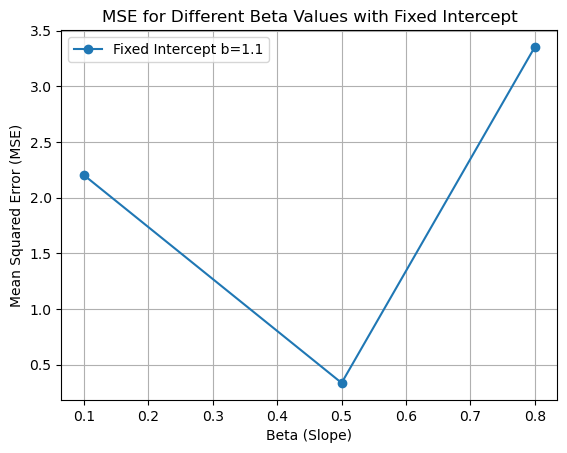

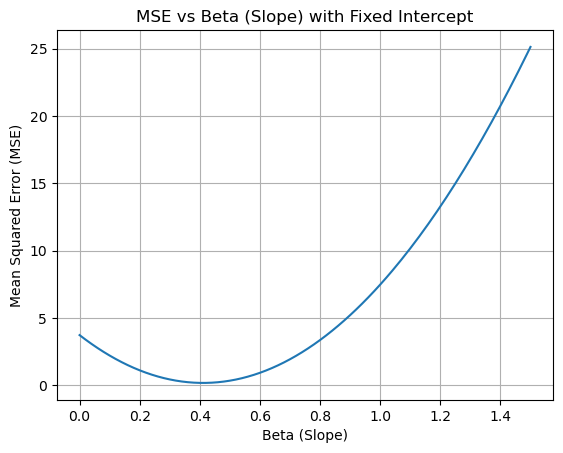

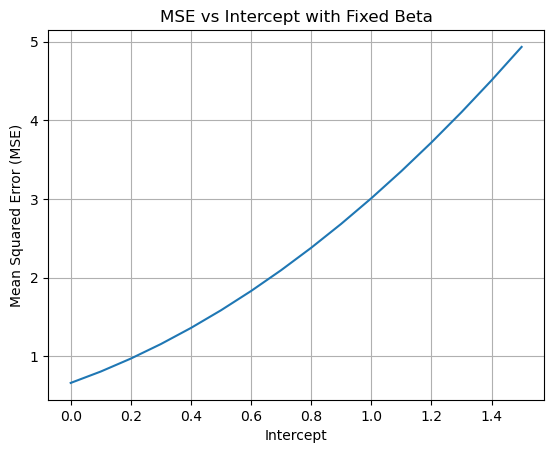

In [28]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y = df[['experience']].to_numpy()
X = df['salary'].to_numpy()

# # fit data using the matrix method
# X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# intercept_optimal = theta_best[0]
# beta_optimal = theta_best[1]

# print(f'Optimal Intercept: {intercept_optimal}')
# print(f'Optimal Slope: {beta_optimal}')

# calculate MSE
def calculate_mse(beta, intercept, X, y):
    y_pred = X.flatten() * beta + intercept
    mse = mean_squared_error(y, y_pred)
    return mse

intercept = 1.1
mse_values = []
betas = [0.1, 0.5, 0.8]

for beta in betas:
    mse = calculate_mse(beta, intercept, X, y)
    mse_values.append(mse)

plt.figure()
plt.plot(betas, mse_values, 'o-', label='Fixed Intercept b=1.1')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Beta Values with Fixed Intercept')
plt.grid(True)
plt.legend()
plt.show()

betas = np.arange(0, 1.51, 0.01)
intercept = 1.1 # fixed intercept
mse_values = []

for beta in betas:
    mse = calculate_mse(beta, intercept, X, y)
    mse_values.append(mse)

plt.figure()
plt.plot(betas, mse_values)
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Beta (Slope) with Fixed Intercept')
plt.grid(True)
plt.show()

intercepts = np.arange(0, 1.51, 0.1)  
beta = 0.8  # fixed beta
mse_values = []

for intercept in intercepts:
    mse = calculate_mse(beta, intercept, X, y)
    mse_values.append(mse)

plt.figure()
plt.plot(intercepts, mse_values)
plt.xlabel('Intercept')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Intercept with Fixed Beta')
plt.grid(True)
plt.show()



In [34]:
data = {
    "hours": [1,2,3,4,5,6,7,8],
    "pass": [0,0,0,0,1,1,1,1]
}

df = pd.DataFrame(data)
print(df)
df.to_csv('pass_fail.csv', index=False)

   hours  pass
0      1     0
1      2     0
2      3     0
3      4     0
4      5     1
5      6     1
6      7     1
7      8     1


SGD - Intercept (b0): [-0.01361021]
SGD - Slope (b1): [0.12305319]
SGD - Final MSE/Error: 0.08499992997932114


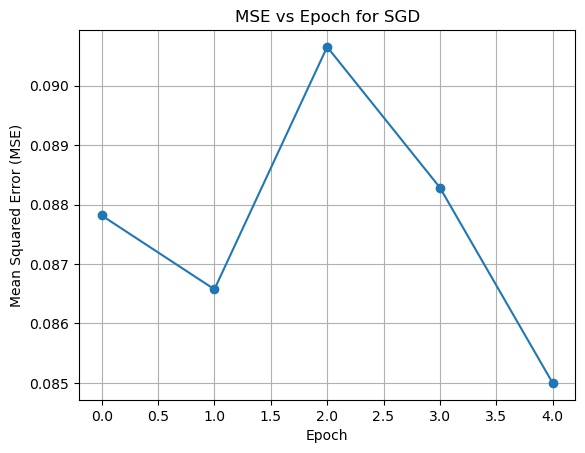

Scikit-learn - Intercept (b0): -0.009302719350823361
Scikit-learn - Slope (b1): 0.13135299672908363
Scikit-learn - Final MSE/Error: 0.08456436923657909


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


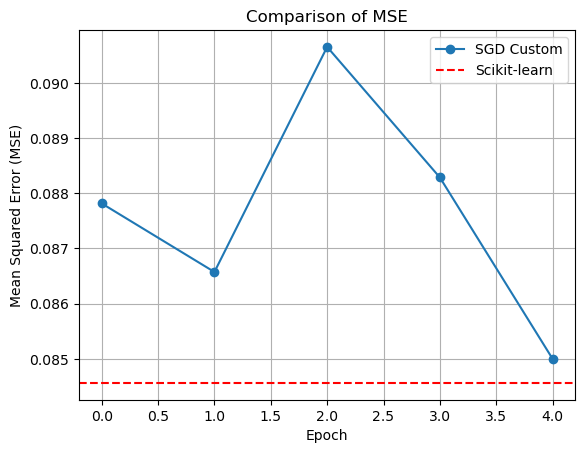

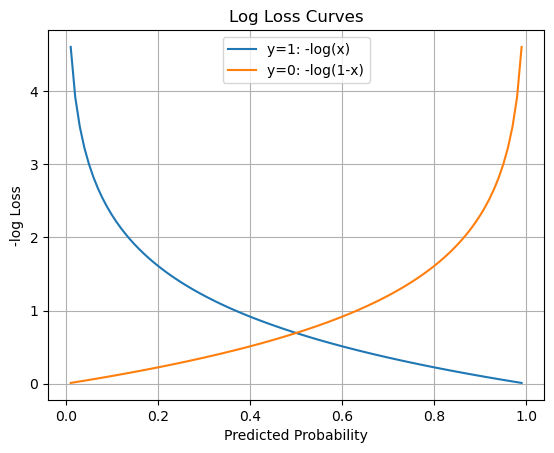

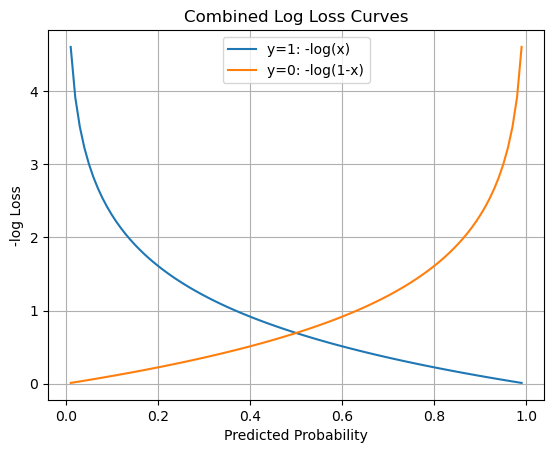

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('pass_fail.csv')
y = df['pass'].to_numpy()
X = df[['hours']].to_numpy()

class StochasticGradientDescent:
    def __init__(self, lr=0.01, epochs=5):
        self.lr = lr
        self.epochs = epochs
        self.b0 = 0
        self.b1 = 0
    
    def fit(self, X, y):
        self.m = X.shape[0]
        self.history = []
        for epoch in range(self.epochs):
            for i in range(self.m):
                idx = np.random.randint(self.m)
                xi = X[idx]
                yi = y[idx]
                
                y_pred = self.b0 + self.b1 * xi
                
                error = y_pred - yi
                gradient_b0 = error
                gradient_b1 = error * xi
                
                self.b0 -= self.lr * gradient_b0
                self.b1 -= self.lr * gradient_b1
            
            y_pred_all = self.b0 + self.b1 * X.flatten()
            mse_epoch = mean_squared_error(y, y_pred_all)
            self.history.append(mse_epoch)
        
        return self.b0, self.b1, self.history

# fit the model
sgd = StochasticGradientDescent(lr=0.01, epochs=5)
b0_sgd, b1_sgd, history_sgd = sgd.fit(X, y)

print(f'SGD - Intercept (b0): {b0_sgd}')
print(f'SGD - Slope (b1): {b1_sgd}')
print(f'SGD - Final MSE/Error: {history_sgd[-1]}')

# mse vs iter
plt.figure()
plt.plot(range(len(history_sgd)), history_sgd, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Epoch for SGD')
plt.grid(True)
plt.show()

model = SGDRegressor(max_iter=5, learning_rate='constant', eta0=0.01)
model.fit(X, y)

b0_sklearn = model.intercept_[0]
b1_sklearn = model.coef_[0]
y_pred_sklearn = model.predict(X)

mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f'Scikit-learn - Intercept (b0): {b0_sklearn}')
print(f'Scikit-learn - Slope (b1): {b1_sklearn}')
print(f'Scikit-learn - Final MSE/Error: {mse_sklearn}')

plt.figure()
plt.plot(range(len(history_sgd)), history_sgd, label='SGD Custom', marker='o')
plt.axhline(y=mse_sklearn, color='r', linestyle='--', label='Scikit-learn')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE')
plt.legend()
plt.grid(True)
plt.show()

def log_loss_error(y, y_pred):
    return (-1/X.shape)*(np.sum(np.log(y) * np.log(y_pred) + np.log(1-y) * np.log(1-y_pred)))

def plot_log_loss_curves():
    
    
    
    x = np.linspace(0.01, 0.99, 100)
    y1 = -np.log(x)
    y0 = -np.log(1 - x)

    plt.figure()
    plt.plot(x, y1, label='y=1: -log(x)')
    plt.plot(x, y0, label='y=0: -log(1-x)')
    plt.xlabel('Predicted Probability')
    plt.ylabel('-log Loss')
    plt.title('Log Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()
    

    plt.figure()
    plt.plot(x, y1, label='y=1: -log(x)')
    plt.plot(x, y0, label='y=0: -log(1-x)')
    plt.xlabel('Predicted Probability')
    plt.ylabel('-log Loss')
    plt.title('Combined Log Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_log_loss_curves()


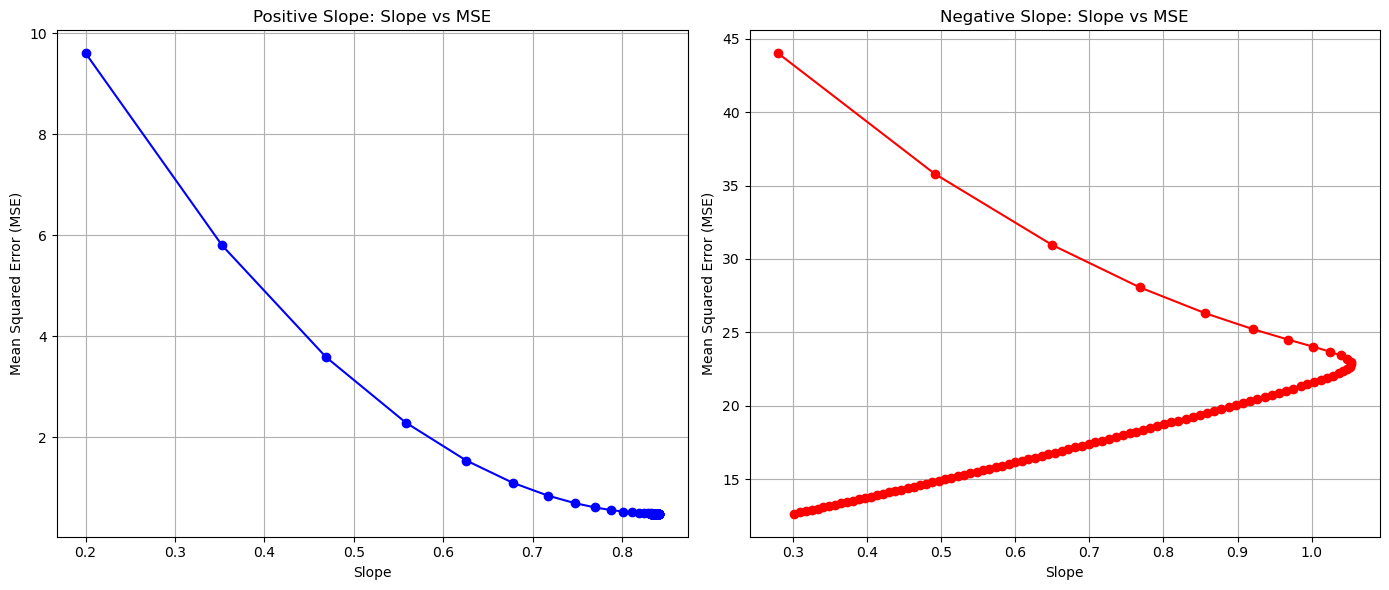

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])  # Positive slope

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])  # Negative slope

class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.slope = 0
        self.intercept = 0
    
    def fit(self, X, y):
        self.history_slope = []
        self.history_mse = []
        m = len(y)
        
        for epoch in range(self.epochs):
            y_pred = self.slope * X + self.intercept
            
            error = y_pred - y
            gradient_slope = (2/m) * np.sum(error * X)
            gradient_intercept = (2/m) * np.sum(error)
            
            self.slope -= self.lr * gradient_slope
            self.intercept -= self.lr * gradient_intercept
            
            mse = np.mean(error ** 2)
            self.history_slope.append(self.slope)
            self.history_mse.append(mse)
        
        return self.slope, self.intercept, self.history_slope, self.history_mse

model_pos = LinearRegressionGD(lr=0.01, epochs=100)
slope_pos, intercept_pos, history_slope_pos, history_mse_pos = model_pos.fit(x_pos, y_pos)

model_neg = LinearRegressionGD(lr=0.01, epochs=100)
slope_neg, intercept_neg, history_slope_neg, history_mse_neg = model_neg.fit(x_neg, y_neg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_slope_pos, history_mse_pos, marker='o', color='blue')
plt.xlabel('Slope')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Positive Slope: Slope vs MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_slope_neg, history_mse_neg, marker='o', color='red')
plt.xlabel('Slope')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Negative Slope: Slope vs MSE')
plt.grid(True)

plt.tight_layout()
plt.show()


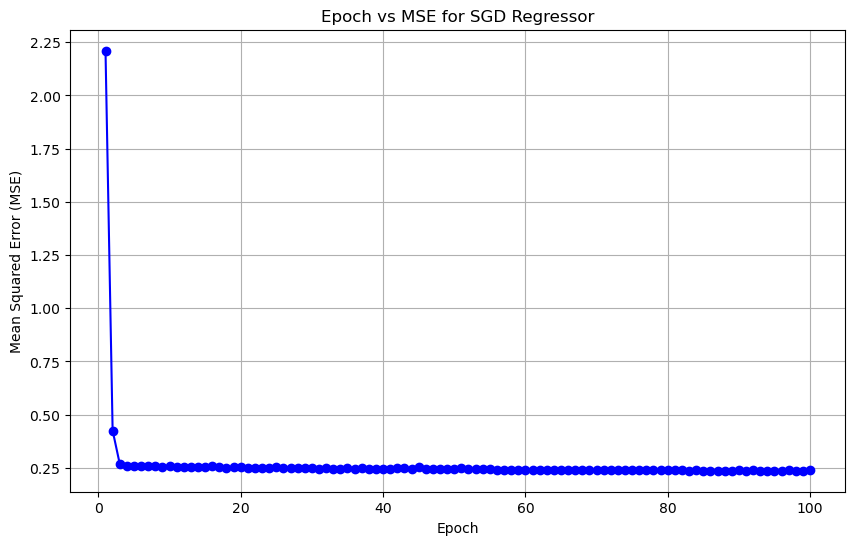

Final Intercept (B0): 0.13080101155703755
Final Slope (B1): 1.5302704038469301
Final MSE: 0.2391138884368875


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('salary_experience.csv')

X = df[['experience']].to_numpy()
y = df['salary'].to_numpy()

# often helps with SGD
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

epochs = 100  
learning_rate = 'constant'
eta0 = 0.01

mse_history = []

model = SGDRegressor(max_iter=1, learning_rate=learning_rate, eta0=eta0, tol=None, warm_start=True)

for epoch in range(epochs):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)
    
    model.n_iter_ += 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), mse_history, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Epoch vs MSE for SGD Regressor')
plt.grid(True)
plt.show()

b0 = model.intercept_[0]
b1 = model.coef_[0]
print(f'Final Intercept (B0): {b0}')
print(f'Final Slope (B1): {b1}')
print(f'Final MSE: {mse_history[-1]}')



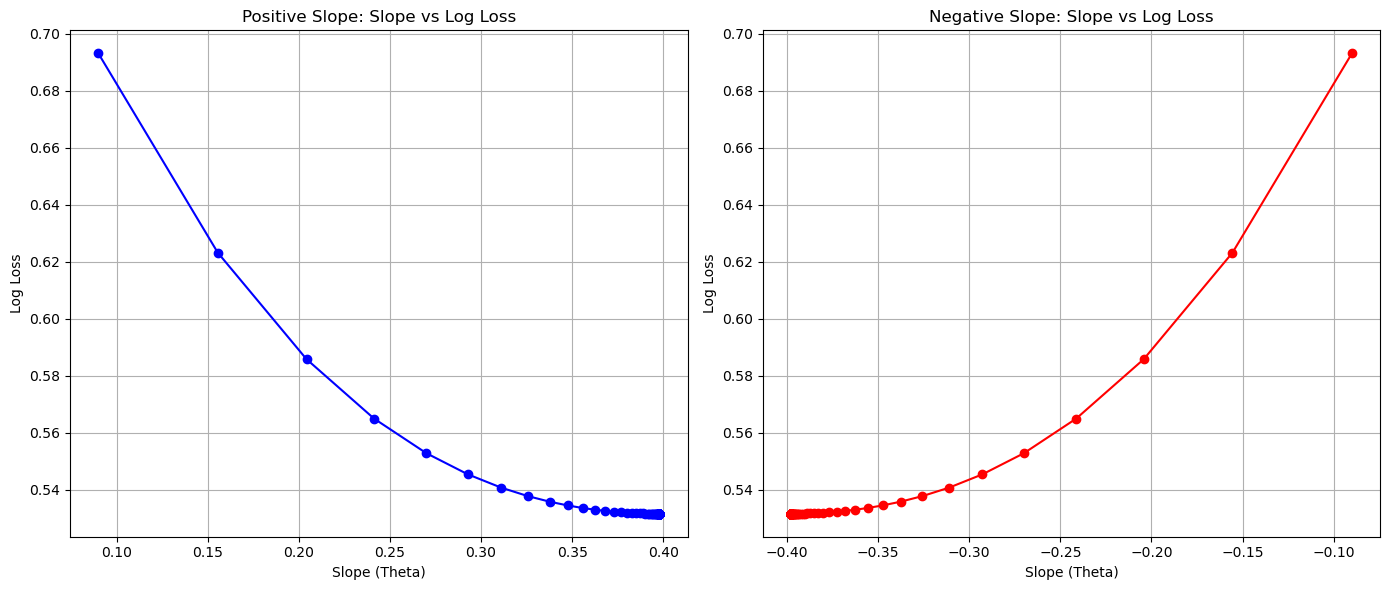

Final Theta for Positive Slope: 0.39785319346044695
Final Log Loss for Positive Slope: 0.5316419315168545
Final Theta for Negative Slope: -0.3978531934604469
Final Log Loss for Negative Slope: 0.5316419315168545


In [42]:
import numpy as np
import matplotlib.pyplot as plt

x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])  # Positive slope

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])  # Negative slope

class LogisticRegressionGD:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.theta = 0  # slope only, for simplicity
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.history_theta = []
        self.history_log_loss = []
        m = len(y)
        
        for epoch in range(self.epochs):
            z = X * self.theta
            predictions = self.sigmoid(z)
            
            error = predictions - y
            gradient = (1/m) * np.sum(error * X)
            
            self.theta -= self.lr * gradient
            
            log_loss = - (1/m) * np.sum(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.history_theta.append(self.theta)
            self.history_log_loss.append(log_loss)
        
        return self.theta, self.history_theta, self.history_log_loss

model_pos = LogisticRegressionGD(lr=0.1, epochs=1000)
theta_pos, history_theta_pos, history_log_loss_pos = model_pos.fit(x_pos, y_pos)

model_neg = LogisticRegressionGD(lr=0.1, epochs=1000)
theta_neg, history_theta_neg, history_log_loss_neg = model_neg.fit(x_neg, y_neg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_theta_pos, history_log_loss_pos, marker='o', linestyle='-', color='blue')
plt.xlabel('Slope (Theta)')
plt.ylabel('Log Loss')
plt.title('Positive Slope: Slope vs Log Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_theta_neg, history_log_loss_neg, marker='o', linestyle='-', color='red')
plt.xlabel('Slope (Theta)')
plt.ylabel('Log Loss')
plt.title('Negative Slope: Slope vs Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'Final Theta for Positive Slope: {theta_pos}')
print(f'Final Log Loss for Positive Slope: {history_log_loss_pos[-1]}')

print(f'Final Theta for Negative Slope: {theta_neg}')
print(f'Final Log Loss for Negative Slope: {history_log_loss_neg[-1]}')
